# Feed Foward NN
Consider the neural network given in the figure below, with ReLU activation functions (denoted by ) on all neurons, and a softmax activation function in the output layer:

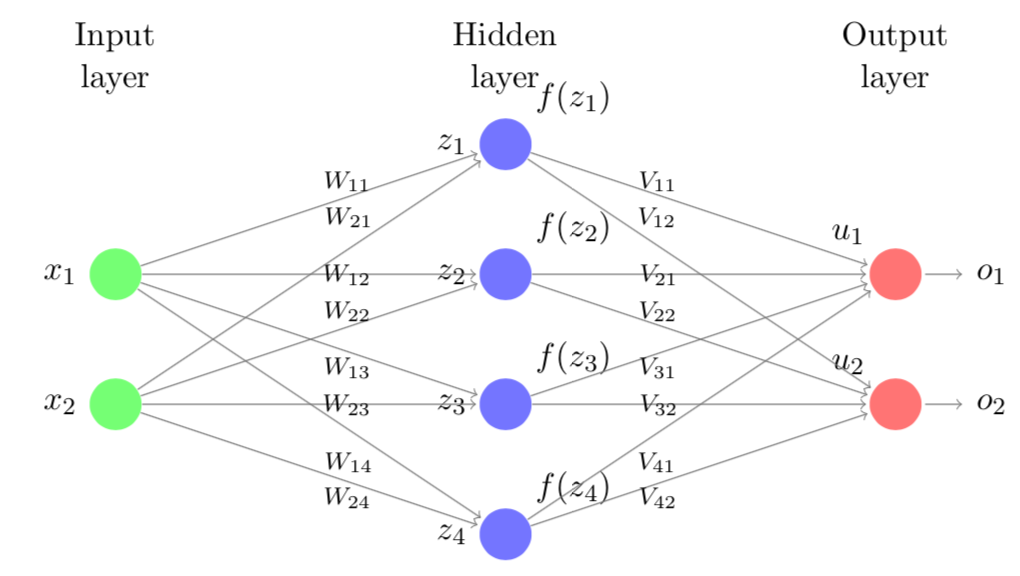


In [1]:
import numpy as np

In [49]:
def softmax(U):
    """
    Compute the softmax probabilities for each row of a vector or matrix.

    The softmax function maps a vector of real numbers to a probability 
    distribution where all values are positive and sum to 1 across the last axis.

    Args:
        U (np.ndarray): Input array of shape (n, m) or (n,), 
                        where softmax is computed over axis=1 if 2D 
                        or axis=0 if 1D.

    Returns:
        np.ndarray: Softmax probabilities with the same shape as U.
    """
    # Numerical stability: subtract max to prevent overflow
    U_stable = U # - np.max(U, axis=-1, keepdims=True)
    exp_U = np.exp(U_stable)
    softmax_prob = exp_U / np.sum(exp_U, axis=-1, keepdims=True)
    return softmax_prob

def ReLU(x):
    return np.maximum(0, x)



In [25]:
def NN(X, W, V):
    """
    Compute the forward pass of a simple 2-layer neural network.

    Architecture:
        Input (size: 2)
        → Dense layer (4 neurons, ReLU activation)
        → Dense layer (2 neurons, ReLU activation)
        → Softmax output

    Args:
        X (np.ndarray): Input vector of shape (2,).
        W (np.ndarray): First layer weights and biases, shape (4, 3).
                        Columns 0–1: weights, column 2: bias.
        V (np.ndarray): Second layer weights and biases, shape (2, 5).
                        Columns 0–3: weights, column 4: bias.

    Returns:
        np.ndarray: Softmax probabilities, shape (2,).
    """
    # First layer
    z1 = W[:, :2] @ X + W[:, 2]    # Linear combination
    a1 = ReLU(z1)                  # Activation

    # Second layer
    z2 = V[:, :4] @ a1 + V[:, 4]   # Linear combination
    a2 = ReLU(z2)                  # Activation

    # Output
    return softmax(a2)

In [26]:
W = np.array([
    [ 1,  0, -1],
    [ 0,  1, -1],
    [-1,  0, -1],
    [ 0, -1, -1]
])

V = np.array([
    [ 1,  1,  1,  1,  0],
    [-1, -1, -1, -1,  2]
])

X = np.array([3, 14])
X = X.T



In [27]:
NN(X, W, V)

array([9.99999694e-01, 3.05902227e-07])

## 2.
Para el problema dos se puede hacer el calculo a mano.

In [52]:
def NN(X, W, V):
    """
    Compute the forward pass of a simple 2-layer neural network.

    Architecture:
        Input (size: 2)
        → Dense layer (4 neurons, ReLU activation)
        → Dense layer (2 neurons, ReLU activation)
        → Softmax output

    Args:
        X (np.ndarray): Input vector of shape (2,).
        W (np.ndarray): First layer weights and biases, shape (4, 3).
                        Columns 0–1: weights, column 2: bias.
        V (np.ndarray): Second layer weights and biases, shape (2, 5).
                        Columns 0–3: weights, column 4: bias.

    Returns:
        np.ndarray: Softmax probabilities, shape (2,).
    """
    # First layer
    z1 = W[:, :2] @ X + W[:, 2]    # Linear combination
    a1 = ReLU(z1)                  # Activation
    # Problem 2
    a1 = np.array([1, 1, 1, 1])
    # a1 = np.array([0, 0, 0, 0])
    # a1 = np.array([3, 3, 3, 3])
    # Second layer
    z2 = V[:, :4] @ a1 + V[:, 4]   # Linear combination
    print(z2)
    a2 = ReLU(z2)                  # Activation

    # Output
    return softmax(a2)

In [53]:
NN(X, W, V)[0]

[ 4 -2]


np.float64(0.9820137900379085)

In [45]:
NN(X, W, V)[0]

np.float64(0.11920292202211755)

In [47]:
NN(X, W, V)[0]

np.float64(0.9999938558253978)